In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing 

In [2]:
tit_train= pd.read_csv("tit_train.csv")

In [3]:
tit_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tit_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
tit_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
Age_new=np.where(tit_train["Age"].isnull(),29,tit_train["Age"])

In [7]:
tit_train["Age"]=Age_new

In [8]:
tit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
label_encoder=preprocessing.LabelEncoder()

In [10]:
Gender=label_encoder.fit_transform(tit_train["Sex"])

In [11]:
tree_model=tree.DecisionTreeClassifier(max_depth=6)

In [12]:
IDV=pd.DataFrame([Gender,tit_train["Age"],tit_train["Fare"]]).T

In [13]:
IDV

,0,1,2
0,1.0,22.0,7.2500
1,0.0,38.0,71.2833
2,0.0,26.0,7.9250
3,0.0,35.0,53.1000
4,1.0,35.0,8.0500
...,...,...,...
886,1.0,27.0,13.0000
887,0.0,19.0,30.0000
888,0.0,29.0,23.4500
889,1.0,26.0,30.0000


In [15]:
tree_model.fit(X=IDV,y=tit_train["Survived"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
with open("Dtree1.dot",'w') as f:
    f=tree.export_graphviz(tree_model,feature_names=["Gender","Age","Fare"],out_file=f);

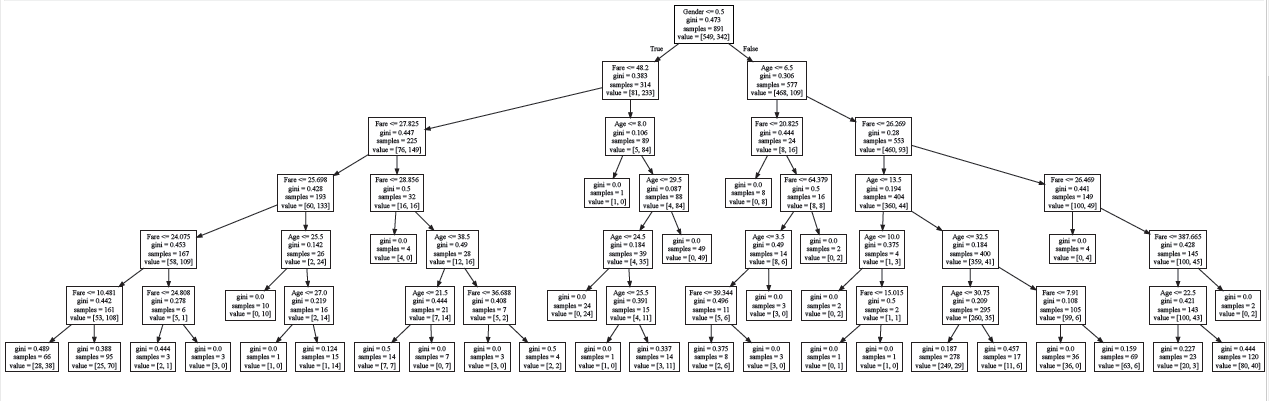

In [17]:
from IPython.display import Image
Image(filename="24_1.png",width=1000,height=600)

[tree.pdf](day_24.pdf)

In [18]:
tree_model.score(X=IDV,y=tit_train["Survived"])

0.8271604938271605

## Prediction

In [19]:
tit_test=pd.read_csv("tit_test.csv")

In [20]:
tit_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
tit_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [22]:
Age_new1=np.where(tit_test["Age"].isnull(),29,tit_test["Age"])

In [23]:
tit_test["Age"]=Age_new1

In [24]:
Fare1=np.where(tit_test["Fare"].isnull(),35,tit_test["Fare"])

In [25]:
tit_test["Fare"]=Fare1

In [26]:
label_encoder=preprocessing.LabelEncoder()

In [27]:
Gender1=label_encoder.fit_transform(tit_test["Sex"])

In [28]:
IDV1=pd.DataFrame([Gender1,tit_test["Age"],tit_test["Fare"]]).T

In [29]:
test_pred=tree_model.predict(X=IDV1)

In [30]:
pred_out=pd.DataFrame({"PassengerId":tit_test["PassengerId"],"Survived":test_pred})

In [31]:
pred_out.to_csv("Output.csv",index=False)

## Part_2

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
label_encoder=preprocessing.LabelEncoder()

In [34]:
df = pd.read_csv("general_data.csv")

In [35]:
df=df.drop(["StandardHours","EmployeeCount","EmployeeID","Over18"],axis=1)

In [36]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [37]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [38]:
df.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,1.106689,47068.888559,2.498887,3.659108,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [39]:
df["NumCompaniesWorked"]=np.where(df["NumCompaniesWorked"].isnull(),2,df["NumCompaniesWorked"])

In [40]:
df["TotalWorkingYears"]=np.where(df["TotalWorkingYears"].isnull(),11,df["TotalWorkingYears"])

In [41]:
df.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [42]:
objc=["Attrition","MaritalStatus","JobRole","BusinessTravel","Department","EducationField","Gender"]

In [43]:
for i in objc:
    df[i]=label_encoder.fit_transform(df[i])

#### random forest

In [44]:
rf_model1=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)

In [45]:
features=['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [46]:
rf_model1.fit(X=df[features],y=df["Attrition"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
print("OOB Accuracy: ")
print(rf_model1.oob_score_);

OOB Accuracy: 
0.9997732426303855


In [48]:
lis=[]
for feature,imp in zip(features,rf_model1.feature_importances_):
    lis.append((feature,imp))

In [49]:
flist=sorted(lis, key = lambda x: x[1])

In [50]:
flist

[('Gender', 0.01845038706745415),
 ('Department', 0.026138488136519478),
 ('BusinessTravel', 0.027731306457409326),
 ('StockOptionLevel', 0.03407436553911332),
 ('JobLevel', 0.037726467682026685),
 ('MaritalStatus', 0.0392870067281594),
 ('Education', 0.041065649000246854),
 ('EducationField', 0.04113435760140199),
 ('YearsSinceLastPromotion', 0.04293117148765752),
 ('TrainingTimesLastYear', 0.044808056561789135),
 ('YearsWithCurrManager', 0.05372566145617186),
 ('JobRole', 0.05523251957493701),
 ('NumCompaniesWorked', 0.0557109971697994),
 ('PercentSalaryHike', 0.06606469660588804),
 ('YearsAtCompany', 0.06883960503932457),
 ('DistanceFromHome', 0.06985228158756236),
 ('TotalWorkingYears', 0.0861790308742756),
 ('MonthlyIncome', 0.09509625028308608),
 ('Age', 0.09595170114717728)]

In [51]:
flist[-6:] # comparitively significant as >0.06(say)

[('PercentSalaryHike', 0.06606469660588804),
 ('YearsAtCompany', 0.06883960503932457),
 ('DistanceFromHome', 0.06985228158756236),
 ('TotalWorkingYears', 0.0861790308742756),
 ('MonthlyIncome', 0.09509625028308608),
 ('Age', 0.09595170114717728)]

#### decision tree

In [52]:
tree_model2=tree.DecisionTreeClassifier(max_depth=8)

In [53]:
IDV2=pd.DataFrame(df[['Age','MonthlyIncome','TotalWorkingYears','DistanceFromHome']])
IDV2

,Age,MonthlyIncome,TotalWorkingYears,DistanceFromHome
0,51,131160,1.0,6
1,31,41890,6.0,10
2,32,193280,5.0,17
3,38,83210,13.0,2
4,32,23420,9.0,10
...,...,...,...,...
4405,42,60290,10.0,5
4406,29,26790,10.0,2
4407,25,37020,5.0,25
4408,42,23980,10.0,18


In [54]:
tree_model2.fit(X=IDV2,y=df["Attrition"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
with open("Dtree2.dot",'w') as f:
    f=tree.export_graphviz(tree_model2,feature_names=['Age','MonthlyIncome','TotalWorkingYears','DistanceFromHome'],out_file=f);

In [56]:
tree_model2.score(X=IDV2,y=df["Attrition"])

0.8870748299319728

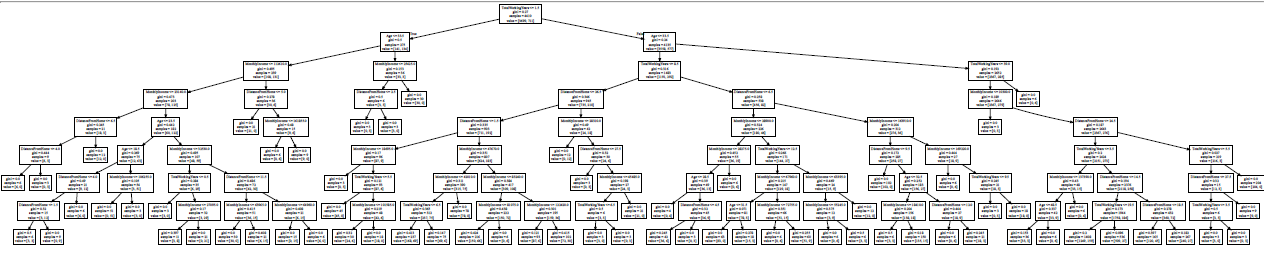

In [57]:
Image(filename="24_2.png",width=1000,height=600)

[tree2.pdf](day_24_2.pdf)

## Part_3

In [58]:
df3=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name="Data")

In [59]:
df3.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [60]:
df3.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [61]:
df3=df3.drop(["ID","ZIP Code"],axis=1)

In [62]:
df3.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


#### random forest

In [65]:
rf_model3=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)

In [66]:
features3=[ 'Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

In [67]:
rf_model3.fit(X=df3[features3],y=df3["Personal Loan"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
print("OOB Accuracy: ")
print(rf_model3.oob_score_);

OOB Accuracy: 
0.988


In [69]:
lis3=[]
for feature,imp in zip(features3,rf_model3.feature_importances_):
    lis3.append((feature,imp))

In [70]:
flist3=sorted(lis3, key = lambda x: x[1])

In [71]:
flist3

[('Securities Account', 0.00574039353150713),
 ('Online', 0.008558187831339966),
 ('CreditCard', 0.009915110305192213),
 ('Mortgage', 0.0440887753049981),
 ('Experience', 0.04490948571440779),
 ('Age', 0.045245233035305844),
 ('CD Account', 0.05389179291722403),
 ('Family', 0.0984802541114431),
 ('Education', 0.1681990749163616),
 ('CCAvg', 0.18425501437276698),
 ('Income', 0.33671667795945315)]

In [72]:
flist3[-4:]

[('Family', 0.0984802541114431),
 ('Education', 0.1681990749163616),
 ('CCAvg', 0.18425501437276698),
 ('Income', 0.33671667795945315)]

#### decision tree

In [79]:
IDV3=pd.DataFrame(df3[['Family','Education','CCAvg','Income']])
IDV3

,Family,Education,CCAvg,Income
0,4,1,1.6,49
1,3,1,1.5,34
2,1,1,1.0,11
3,1,2,2.7,100
4,4,2,1.0,45
...,...,...,...,...
4995,1,3,1.9,40
4996,4,1,0.4,15
4997,2,3,0.3,24
4998,3,2,0.5,49


In [80]:
tree_model3=tree.DecisionTreeClassifier(max_depth=8)

In [81]:
df3.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [82]:
tree_model3.fit(X=IDV3,y=df3["Personal Loan"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
with open("Dtree3.dot",'w') as f:
    f=tree.export_graphviz(tree_model3,feature_names=['Family','Education','CCAvg','Income'],out_file=f);

In [84]:
tree_model3.score(X=IDV3,y=df3["Personal Loan"])

0.9954

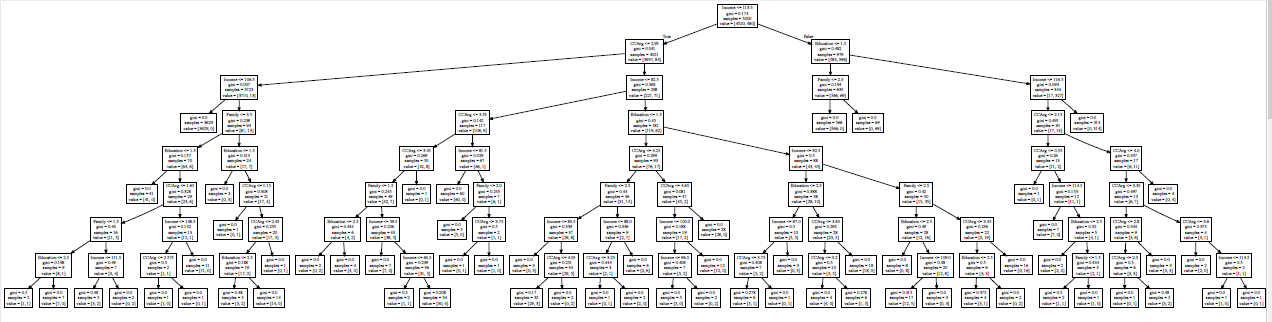

In [86]:
Image(filename="24_3.png",width=1000,height=600)

[tree3.pdf](day_24_3.pdf)